<a href="https://colab.research.google.com/github/FANTASY000666/House_prediction_model/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# @title Import relevant modules.
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# the following line adjust the granularity of reporting.
pd.options.display.max_rows = 10 # a maximum of 10 rows will be displayed when printing a pandas data to 10.
pd.options.display.float_format = "{:.1f}".format # the float values of the dataframe will be displayed with one decimal point.




Load the .csv file into the pandas DataFrame
In the code below: Scaling median_house_value puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.

Although scaling a label is usually not essential, scaling features in a multi-feature model usually is essential.

In [84]:
# @title Importing the dataset
# importing the dataset and storing it in a pandas dataframe called training_df
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Creating a copy of the DataFrame
copied_df = training_df.copy()

# scale the label - every value in the "meadian_house_value" will be sclaed down by factor 1000
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


A large part of machine learning project is getting to know your data.

Pandas has the "describe" function that otput the following statistics about every column in the in the DataFrame.
*   Count: the number of rows in the colums supposed to contain the same value  in every column.
*   Mean and std: contain the mean and std in each column
*   Min and max : min anx maximum value in each column
*   25%, 50%, 75%, which contain various quantiles










In [85]:
# Get statistics on the dataset.
# display the statistics of the dataset
summary_statistics = training_df.describe()

#print the summary statistics
print(summary_statistics)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
count    17000.0   17000.0             17000.0      17000.0         17000.0   
mean      -119.6      35.6                28.6       2643.7           539.4   
std          2.0       2.1                12.6       2179.9           421.5   
min       -124.3      32.5                 1.0          2.0             1.0   
25%       -121.8      33.9                18.0       1462.0           297.0   
50%       -118.5      34.2                29.0       2127.0           434.0   
75%       -118.0      37.7                37.0       3151.2           648.2   
max       -114.3      42.0                52.0      37937.0          6445.0   

       population  households  median_income  median_house_value  
count     17000.0     17000.0        17000.0             17000.0  
mean       1429.6       501.2            3.9               207.3  
std        1147.9       384.5            1.9               116.0  
min           3.0   

In [86]:

# @title identifying anomalies in a dataset
# The maximum value (max) of several columns seems very high compared to the other quantiles.
# For example,the total_rooms column. Given the quantile values (25%, 50%, and 75%), you might expect the
# max value of total_rooms to be approximately 5,000 or possibly 10,000. However, the max value
# is actually 37,937.

# When you see anomalies in a column, become more careful about using that column as a feature.
# That said, anomalies in potential features sometimes mirror anomalies in the label,
# which could make the column be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you might be able to represent (pre-process) raw data
# in order to make columns into useful features.

In [87]:
# @title define functions that build and train a model
def build_model(my_learning_rate):
  """ Create and compile a simple linear regression model """
  # Most tf.keras models are sequential
  # A sequential model contains one or more layers
  model = tf.keras.models.Sequential()

  # Desribe a topography of the model
  # The topography of a simple linear regression model
  # Is a single node in a single layer
  model.add(tf.keras.layers.Dense(units = 1, input_shape=(1,)))

  #compile the model topography into code that
  # TensorFlow can efficiently execute. Configure
  # Training to minimize the Model's mean squared error.
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

def train_model(model, df, feature, label, epochs, batch_size):
  """ Train the model by feeding it data """
  # feed the feature value and the label value to the model
  # The model will train for the specified number of epochs
  # gradually learning how the feature values relate to the label values.

  # The fit method returns a History object, which contains information about the training process.
  # This includes metrics such as the loss and any specified evaluation metrics
  # on both the training and validation sets for each epoch.
  # The history object can be used to analyze the training process,
  # plot training curves,
  # and assess model performance.
  # Plot training loss and accuracy
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs)


  # Gather the trained model's weight and bias.
  # extracting the trained weights and biases from the model after training.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]
  # Examining the weights and biases can help in debugging the model. If the model is not learning as expected,
  # inspecting the weights might reveal whether certain features are being assigned higher or lower importance.

  # The list of epochs is stored separately from the
  # rest of history.
  # this can be of importance when tracking the model training
  epochs = history.epoch

  # Gather the history (a snapshot) of each epoch.
  # loss and accuracy generated in history are stored in a dataframe hist
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean
  # squared error at each epoch.
  # acquiring the mean loss from hist
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")







Defined build_model and train_model


In [88]:
# @title define plotting functions using matplotlib
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")


Defined the plot_the_model and plot_the_loss_curve functions.


Epoch 1/30
567/567 [==============================] - 1s 1ms/step - loss: 27549.8320 - root_mean_squared_error: 165.9814
Epoch 2/30
567/567 [==============================] - 1s 1ms/step - loss: 18095.8887 - root_mean_squared_error: 134.5210
Epoch 3/30
567/567 [==============================] - 1s 1ms/step - loss: 17857.9961 - root_mean_squared_error: 133.6338
Epoch 4/30
567/567 [==============================] - 1s 1ms/step - loss: 17637.6211 - root_mean_squared_error: 132.8067
Epoch 5/30
567/567 [==============================] - 1s 1ms/step - loss: 17418.7461 - root_mean_squared_error: 131.9801
Epoch 6/30
567/567 [==============================] - 1s 1ms/step - loss: 17212.3848 - root_mean_squared_error: 131.1960
Epoch 7/30
567/567 [==============================] - 1s 1ms/step - loss: 17014.2949 - root_mean_squared_error: 130.4389
Epoch 8/30
567/567 [==============================] - 1s 1ms/step - loss: 16821.9805 - root_mean_squared_error: 129.6996
Epoch 9/30
567/567 [============

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


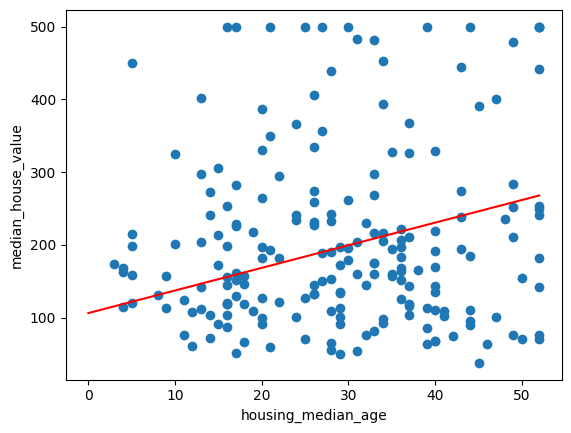

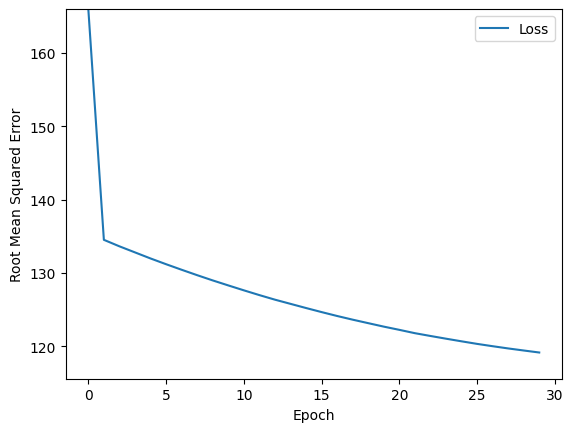

In [89]:
# @title calling the function model and specifying the feature and label.
learning_rate = 0.01
epochs = 30
batch_size = 30

# Specify the feature and the label.
my_feature = "median_income"  # the total number of rooms on a specific city block.
                                   # try chosing a different feature
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based
# solely on total_rooms.

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)


# A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model.
# That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

use the model to make predictions, you should make predictions on examples that are not used in training.

In [90]:
# predict_house_values takes in 3 parameters:
# n - the number of houses to predict
# feature - feature used for prediction
# label - the label for comparison
def predict_house_values(n, feature, label):
  """ predict house values using feature.  """
  # creating a batch of data for training the model we use feature 10000 to 10000 + n
  batch = training_df[feature][10000:10000 + n]

  # we use the inbult formula of my_model '.predict_on_batch' to predict the values to be generated by the model
  predicted_values = my_model.predict_on_batch(x=batch)

  # the print statements below were used to print the headers
  # of the output table of predicted values
  print("feature   label          predicted")
  print("  value   value          value")
  print("          in thousand$   in thousand$")
  print("--------------------------------------")

  # the for loop is used to iterate through the predicted value
  # and print them alongside the corresponding actual feature and label values
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][10000 + i],
                                   training_df[label][10000 + i],
                                   predicted_values[i][0] ))

# Now, invoke the house prediction function on 10 examples:
predict_house_values(10, my_feature, my_label)

row_2 = training_df.iloc[2]
print(row_2)

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
   44     53             243
   14     92             150
   14     69             150
   24     62             181
   21     80             172
   24    295             181
   28    500             193
   22    342             175
   17    118             159
    8    128             131
longitude            -114.6
latitude               33.7
housing_median_age     17.0
total_rooms           720.0
total_bedrooms        174.0
population            333.0
households            117.0
median_income           1.7
median_house_value     85.7
Name: 2, dtype: float64


In [91]:
# @title Judge the predicting power of the model.
# Does the model accurately predict house prices?
# Most of the predicted values differ significantly from the label value
# so the trained model probably dosent' have much predictive power
# However the first 10 examples might not be representatives of the rest of the
# examples.
# solution 1: try a different feature(population)
#           : changing the feature did not give any better predictions

# solution 2: Define a synthetic feature
#           : ratio of total_rooms to population
#           : the synthetic feature generated better results,
#            :However, the model still isn't creating great predictions.

# solution 3: Find feature(s) whose raw values correlate with the label
# lets rely on statistics instead to generate a feature

Epoch 1/24
567/567 [==============================] - 1s 1ms/step - loss: 20145.8242 - root_mean_squared_error: 141.9360
Epoch 2/24
567/567 [==============================] - 1s 1ms/step - loss: 16574.1387 - root_mean_squared_error: 128.7406
Epoch 3/24
567/567 [==============================] - 1s 1ms/step - loss: 15624.6641 - root_mean_squared_error: 124.9987
Epoch 4/24
567/567 [==============================] - 1s 1ms/step - loss: 14899.7764 - root_mean_squared_error: 122.0646
Epoch 5/24
567/567 [==============================] - 1s 1ms/step - loss: 14388.4434 - root_mean_squared_error: 119.9518
Epoch 6/24
567/567 [==============================] - 1s 2ms/step - loss: 14036.8584 - root_mean_squared_error: 118.4772
Epoch 7/24
567/567 [==============================] - 1s 2ms/step - loss: 13793.8203 - root_mean_squared_error: 117.4471
Epoch 8/24
567/567 [==============================] - 1s 2ms/step - loss: 13618.0352 - root_mean_squared_error: 116.6963
Epoch 9/24
567/567 [============

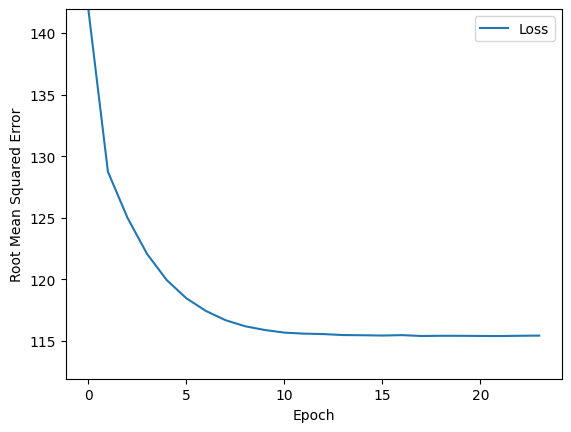

feature   label          predicted
  value   value          value
          in thousand$   in thousand$
--------------------------------------
   44     53             224
   14     92             193
   14     69             193
   24     62             203
   21     80             200
   24    295             203
   28    500             207
   22    342             201
   17    118             196
    8    128             187
   10    187             189
   12     80             191
    7    112             186
   18     95             197
   11     69             190


In [92]:
# @title Define a synthetic feature, steps:
# synthetic data: ratio of total_rooms to population
# Tune the three hyperparameters
# Does this new synthetic feature produce a lower loss value than the single features?

# creating a synthetic data: of ratio of total_rooms to population
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

# Tune the three hyperparameters
learning_rate = 0.06
epochs = 24
batch_size = 30

# invoking the functions to build and train the model.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

In [93]:
# @title using a correlation matrix as a feature
# A correlation matrix indicates how each attribute's raw values relate to the other attributes' raw values.
# correlation values have he following values
# 1.0: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
# -1.0: perfect negative correlation; that is, when one attribute rises, the other attribute falls.
# 0.0: no correlation; the two columns are not linearly related.


# generate a correlation matrix
training_df.corr()

# Determine which of the nine potential features appears to be the best candidate for a feature?
# the median_income correlates 0.7 with the label hence it may be a good feaure


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
